In [3]:
#Phase 1

In [4]:
data_path = "/kaggle/input/dataset/data.csv"

In [5]:
import pandas as pd

# بارگذاری فایل CSV
df = pd.read_csv(data_path, sep=';')


In [6]:


# تنظیمات برای نمایش کامل
pd.set_option('display.max_columns', None)  # نمایش تمام ستون‌ها
pd.set_option('display.max_rows', None)     # نمایش تمام ردیف‌ها (اگر لازم داری)
pd.set_option('display.max_colwidth', None) # نمایش کامل مقدار ستون‌ها با متن طولانی
pd.set_option('display.expand_frame_repr', False)  # جلوگیری از شکست خطوط

# حالا خروجی‌ها به طور کامل نمایش داده می‌شن
print(df.info())
print(df.head())      # برای دیدن چند ردیف اول
print(df.describe())  # آمار توصیفی کامل


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# حالا مجدد اجرا کن:
print(df.isnull().sum())


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
df.nunique()


Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [9]:
df["Target"].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


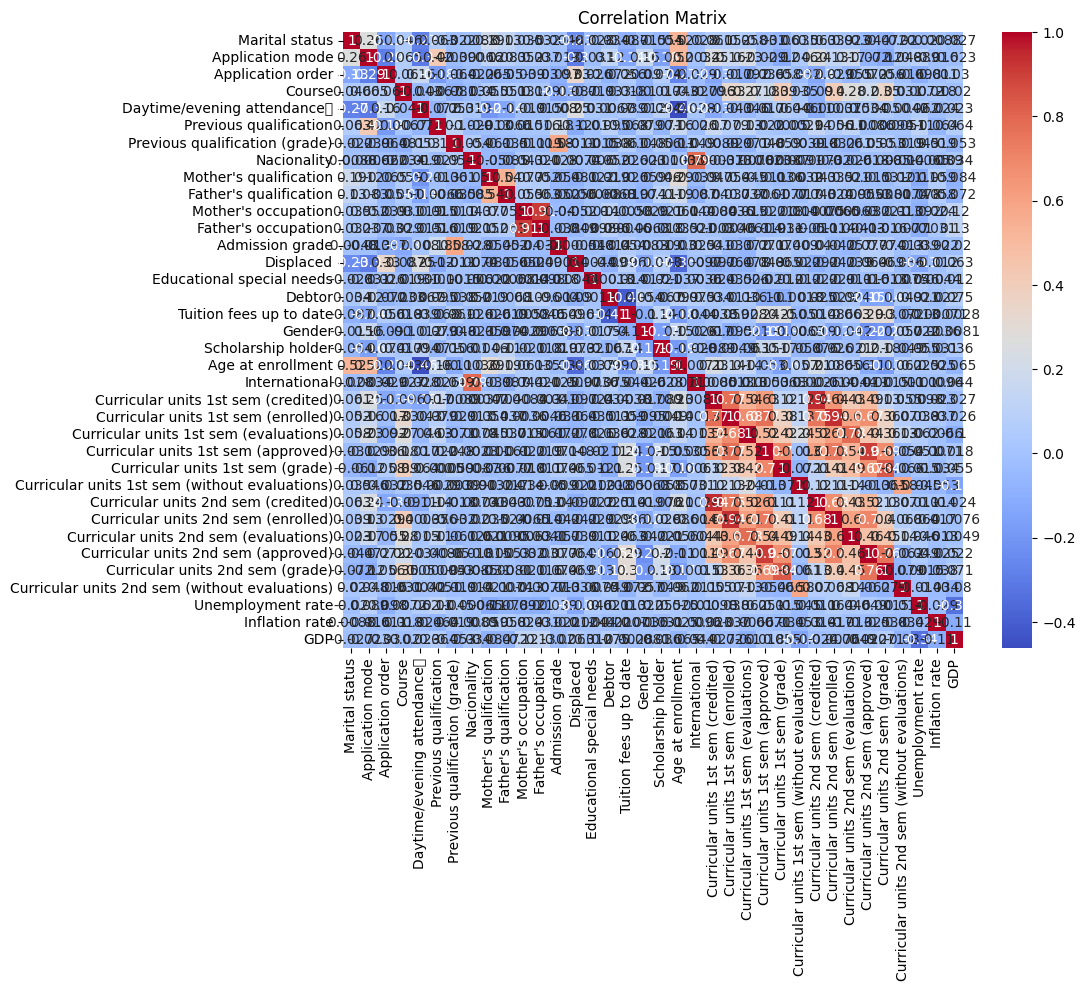

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
df = pd.read_csv(data_path, sep=';')  # مسیر را مطابق فایل خودت تنظیم کن






In [12]:
df = pd.get_dummies(df, columns=["Target"], prefix="Target")


In [13]:
df["Target_Dropout"]= df["Target_Dropout"].astype(int)

In [14]:
df["Target_Enrolled"]= df["Target_Enrolled"].astype(int)

In [15]:
df["Target_Graduate"]= df["Target_Graduate"].astype(int)

In [16]:
corr = df.corr(numeric_only=True)

# همبستگی ویژگی‌ها با هر کلاس خروجی
dropout_corr = corr["Target_Dropout"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"])
enrolled_corr = corr["Target_Enrolled"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"])
graduated_corr = corr["Target_Graduate"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"])


In [17]:
correlations = pd.DataFrame({
    "Dropout": dropout_corr,
    "Enrolled": enrolled_corr,
    "Graduate": graduated_corr
})


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


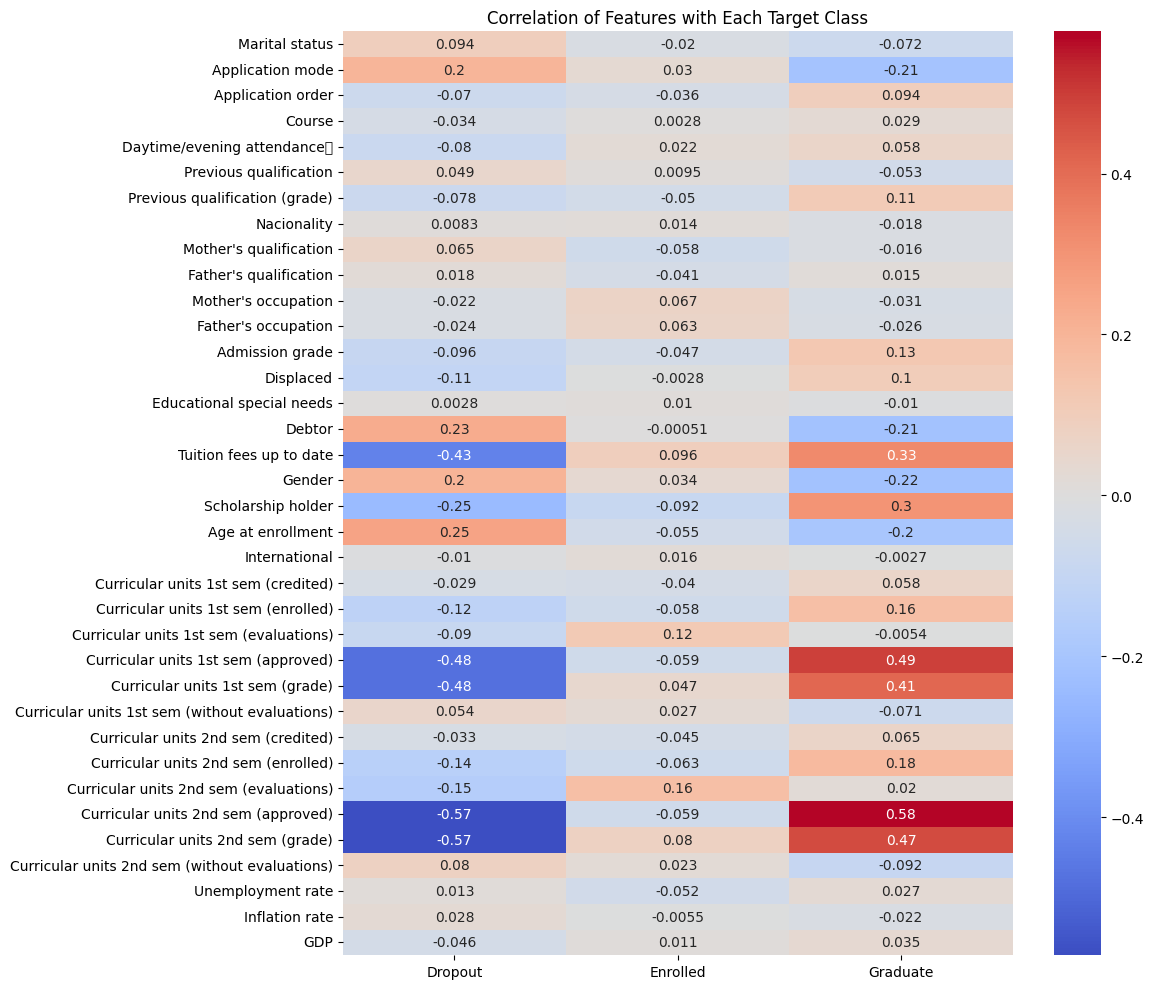

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Features with Each Target Class")
plt.tight_layout()
plt.show()


In [19]:
# محاسبه میانگین قدرمطلق همبستگی‌ها
correlations["MeanAbsCorr"] = correlations.abs().mean(axis=1)

# گرفتن 10 ویژگی با کمترین میانگین همبستگی
least_corr_features = correlations["MeanAbsCorr"].nsmallest(20).index.tolist()

print("ویژگی‌هایی که حذف می‌شوند:")
print(least_corr_features)

ویژگی‌هایی که حذف می‌شوند:
['Educational special needs', 'International', 'Nacionality', 'Inflation rate', 'Course', "Father's qualification", 'Unemployment rate', 'GDP', 'Previous qualification', "Father's occupation", "Mother's occupation", 'Curricular units 1st sem (credited)', "Mother's qualification", 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Daytime/evening attendance\t', 'Marital status', 'Curricular units 2nd sem (without evaluations)', 'Application order', 'Curricular units 1st sem (evaluations)']


In [20]:
df_filtered = df.drop(columns=least_corr_features)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


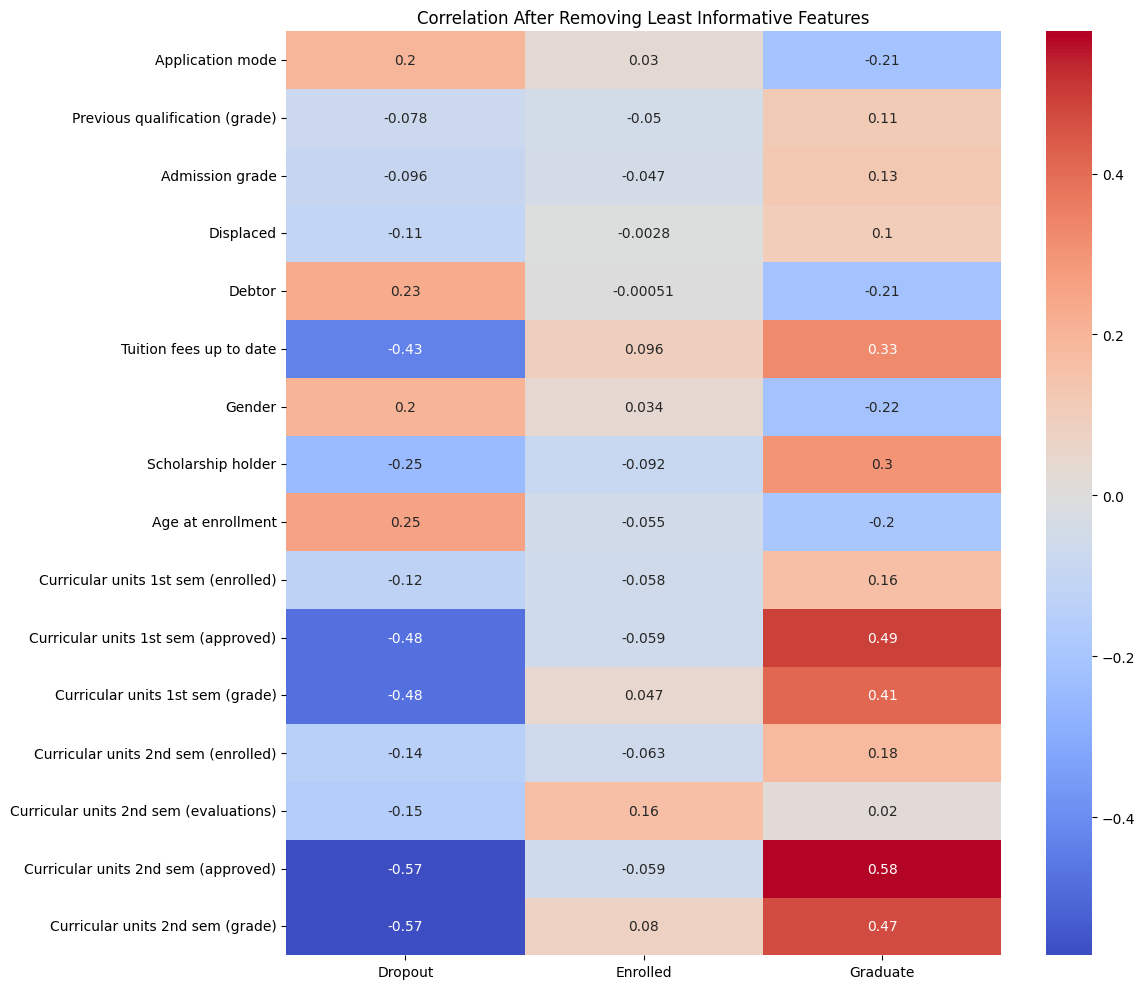

In [21]:
new_corr = df_filtered.corr(numeric_only=True)
new_correlations = pd.DataFrame({
    "Dropout": new_corr["Target_Dropout"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"]),
    "Enrolled": new_corr["Target_Enrolled"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"]),
    "Graduate": new_corr["Target_Graduate"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"]),
})

plt.figure(figsize=(12, 10))
sns.heatmap(new_correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation After Removing Least Informative Features")
plt.tight_layout()
plt.show()

In [22]:
# محاسبه میانگین قدرمطلق همبستگی‌ها
correlations["MeanAbsCorr"] = new_correlations.abs().mean(axis=1)

# گرفتن 10 ویژگی با کمترین میانگین همبستگی
least_corr_features = correlations["MeanAbsCorr"].nsmallest(6).index.tolist()

print("ویژگی‌هایی که حذف می‌شوند:")
print(least_corr_features)

ویژگی‌هایی که حذف می‌شوند:
['Displaced', 'Previous qualification (grade)', 'Admission grade', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']


In [23]:
df_filtered = df_filtered.drop(columns=least_corr_features)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


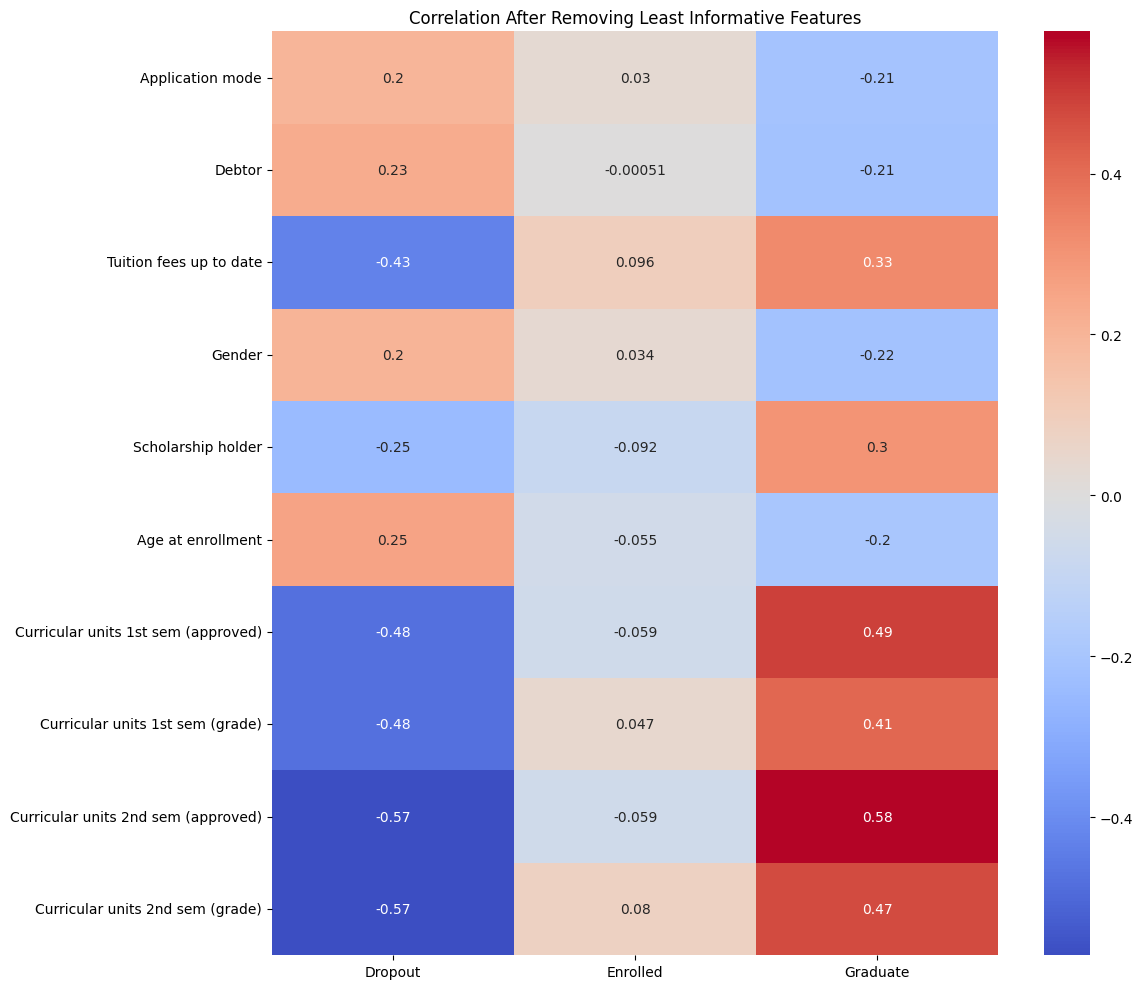

In [24]:
new_corr = df_filtered.corr(numeric_only=True)
new_correlations = pd.DataFrame({
    "Dropout": new_corr["Target_Dropout"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"]),
    "Enrolled": new_corr["Target_Enrolled"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"]),
    "Graduate": new_corr["Target_Graduate"].drop(["Target_Dropout", "Target_Enrolled", "Target_Graduate"]),
})

plt.figure(figsize=(12, 10))
sns.heatmap(new_correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation After Removing Least Informative Features")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(data_path, sep=';')

X = df_filtered.drop(columns=["Target_Dropout", "Target_Enrolled", "Target_Graduate"])
y = df["Target"]

# تقسیم با stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("تعداد نمونه‌ها در آموزش:", len(X_train))
print("تعداد نمونه‌ها در آزمون:", len(X_test))
print("توزیع کلاس‌ها در آموزش:\n", y_train.value_counts(normalize=True))
print("توزیع کلاس‌ها در آزمون:\n", y_test.value_counts(normalize=True))


تعداد نمونه‌ها در آموزش: 3539
تعداد نمونه‌ها در آزمون: 885
توزیع کلاس‌ها در آموزش:
 Target
Graduate    0.499294
Dropout     0.321277
Enrolled    0.179429
Name: proportion, dtype: float64
توزیع کلاس‌ها در آزمون:
 Target
Graduate    0.499435
Dropout     0.320904
Enrolled    0.179661
Name: proportion, dtype: float64


In [26]:
#Phase 2

In [27]:
X.columns

Index(['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')

In [28]:
print(X.describe())

       Application mode       Debtor  Tuition fees up to date       Gender  Scholarship holder  Age at enrollment  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)
count       4424.000000  4424.000000              4424.000000  4424.000000         4424.000000        4424.000000                          4424.000000                       4424.000000                          4424.000000                       4424.000000
mean          18.669078     0.113698                 0.880651     0.351718            0.248418          23.265145                             4.706600                         10.640822                             4.435805                         10.230206
std           17.484682     0.317480                 0.324235     0.477560            0.432144           7.587816                             3.094238                          4.843663                             3.014764           

In [29]:
import numpy as np

def triangular_membership(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)


In [30]:
df_fuzzy = X

In [31]:
# Application mode (1–57)
df_fuzzy["appmode_low"] = triangular_membership(df_fuzzy["Application mode"], 1, 10, 20)
df_fuzzy["appmode_med"] = triangular_membership(df_fuzzy["Application mode"], 15, 25, 35)
df_fuzzy["appmode_high"] = triangular_membership(df_fuzzy["Application mode"], 30, 45, 57)

# Age at enrollment (17–70)
df_fuzzy["age_low"] = triangular_membership(df_fuzzy["Age at enrollment"], 17, 20, 23)
df_fuzzy["age_med"] = triangular_membership(df_fuzzy["Age at enrollment"], 21, 26, 35)
df_fuzzy["age_high"] = triangular_membership(df_fuzzy["Age at enrollment"], 30, 40, 70)

# Curricular units 1st sem (approved) (0–26)
df_fuzzy["sem1_approved_low"] = triangular_membership(df_fuzzy["Curricular units 1st sem (approved)"], 0, 2, 4)
df_fuzzy["sem1_approved_med"] = triangular_membership(df_fuzzy["Curricular units 1st sem (approved)"], 3, 5, 7)
df_fuzzy["sem1_approved_high"] = triangular_membership(df_fuzzy["Curricular units 1st sem (approved)"], 6, 10, 26)

# Curricular units 1st sem (grade) (0–18.875)
df_fuzzy["sem1_grade_low"] = triangular_membership(df_fuzzy["Curricular units 1st sem (grade)"], 0, 5, 10)
df_fuzzy["sem1_grade_med"] = triangular_membership(df_fuzzy["Curricular units 1st sem (grade)"], 8, 12, 16)
df_fuzzy["sem1_grade_high"] = triangular_membership(df_fuzzy["Curricular units 1st sem (grade)"], 14, 17, 18.9)

# Curricular units 2nd sem (approved) (0–20)
df_fuzzy["sem2_approved_low"] = triangular_membership(df_fuzzy["Curricular units 2nd sem (approved)"], 0, 2, 4)
df_fuzzy["sem2_approved_med"] = triangular_membership(df_fuzzy["Curricular units 2nd sem (approved)"], 3, 5, 7)
df_fuzzy["sem2_approved_high"] = triangular_membership(df_fuzzy["Curricular units 2nd sem (approved)"], 6, 10, 20)

# Curricular units 2nd sem (grade) (0–18.57)
df_fuzzy["sem2_grade_low"] = triangular_membership(df_fuzzy["Curricular units 2nd sem (grade)"], 0, 5, 10)
df_fuzzy["sem2_grade_med"] = triangular_membership(df_fuzzy["Curricular units 2nd sem (grade)"], 8, 12, 16)
df_fuzzy["sem2_grade_high"] = triangular_membership(df_fuzzy["Curricular units 2nd sem (grade)"], 14, 17, 18.6)

# ویژگی‌های باینری (0 یا 1) → فازی (نه، بله)

# Debtor
df_fuzzy["debtor_no"] = 1 - df_fuzzy["Debtor"]
df_fuzzy["debtor_yes"] = df_fuzzy["Debtor"]

# Tuition fees up to date
df_fuzzy["fees_not_paid"] = 1 - df_fuzzy["Tuition fees up to date"]
df_fuzzy["fees_paid"] = df_fuzzy["Tuition fees up to date"]

# Gender (0: male, 1: female)
df_fuzzy["gender_male"] = 1 - df_fuzzy["Gender"]
df_fuzzy["gender_female"] = df_fuzzy["Gender"]

# Scholarship holder
df_fuzzy["no_scholarship"] = 1 - df_fuzzy["Scholarship holder"]
df_fuzzy["has_scholarship"] = df_fuzzy["Scholarship holder"]

# نمایش دیتافریم نهایی
print(df_fuzzy.head())


   Application mode  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  appmode_low  appmode_med  appmode_high   age_low  age_med  age_high  sem1_approved_low  sem1_approved_med  sem1_approved_high  sem1_grade_low  sem1_grade_med  sem1_grade_high  sem2_approved_low  sem2_approved_med  sem2_approved_high  sem2_grade_low  sem2_grade_med  sem2_grade_high  debtor_no  debtor_yes  fees_not_paid  fees_paid  gender_male  gender_female  no_scholarship  has_scholarship
0                17       0                        1       1                   0                 20                                    0                          0.000000                                    0                          0.000000          0.3          0.2           0.0  1.000000      0.0  0.000000                0.0                0.0                 

In [32]:
columns_to_drop = [
    "Application mode",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "Age at enrollment",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)"
]

In [33]:
df_fuzzy.drop(columns=columns_to_drop, inplace=True)


In [34]:
print(df_fuzzy.head())

   appmode_low  appmode_med  appmode_high   age_low  age_med  age_high  sem1_approved_low  sem1_approved_med  sem1_approved_high  sem1_grade_low  sem1_grade_med  sem1_grade_high  sem2_approved_low  sem2_approved_med  sem2_approved_high  sem2_grade_low  sem2_grade_med  sem2_grade_high  debtor_no  debtor_yes  fees_not_paid  fees_paid  gender_male  gender_female  no_scholarship  has_scholarship
0          0.3          0.2           0.0  1.000000      0.0  0.000000                0.0                0.0                 0.0             0.0        0.000000              0.0                0.0                0.0                 0.0             0.0        0.000000              0.0          1           0              0          1            0              1               1                0
1          0.5          0.0           0.0  0.666667      0.0  0.000000                0.0                0.5                 0.0             0.0        0.500000              0.0                0.0              

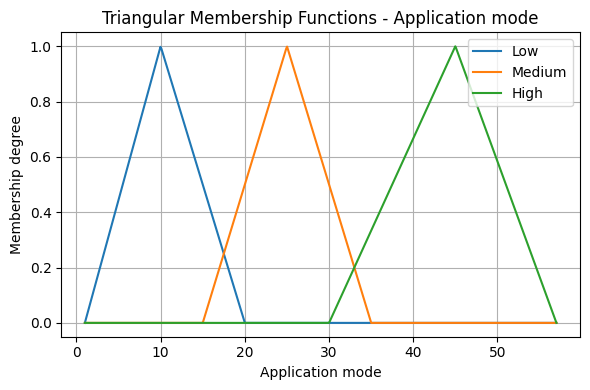

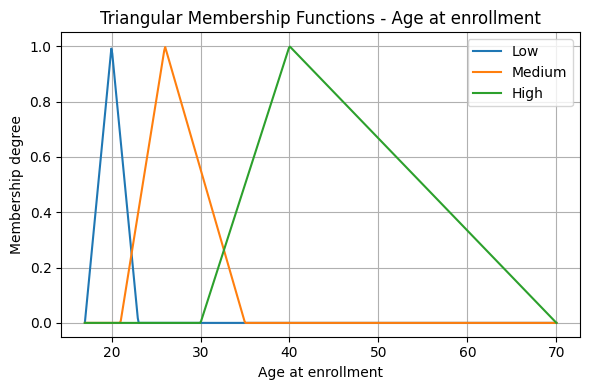

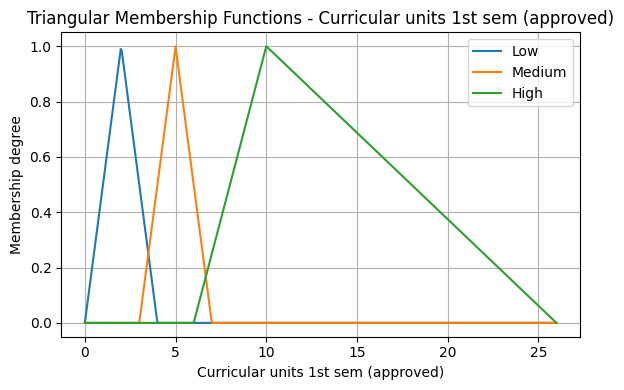

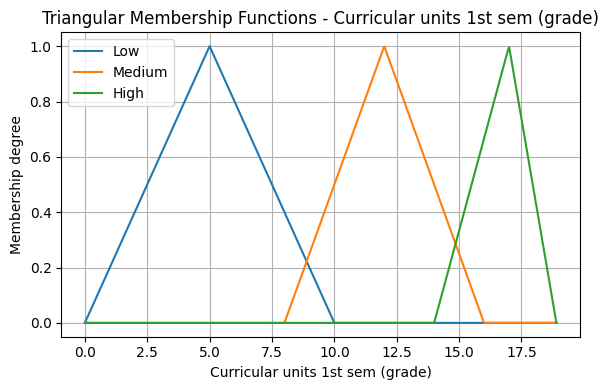

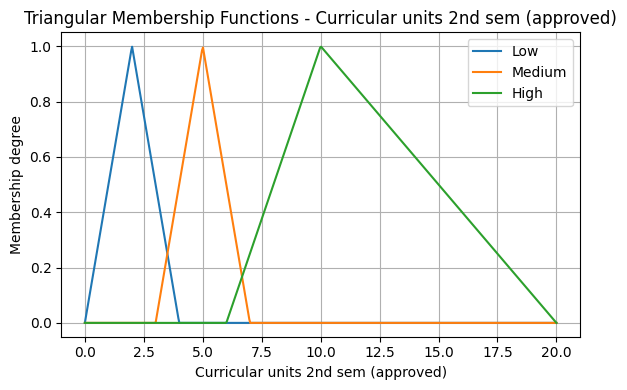

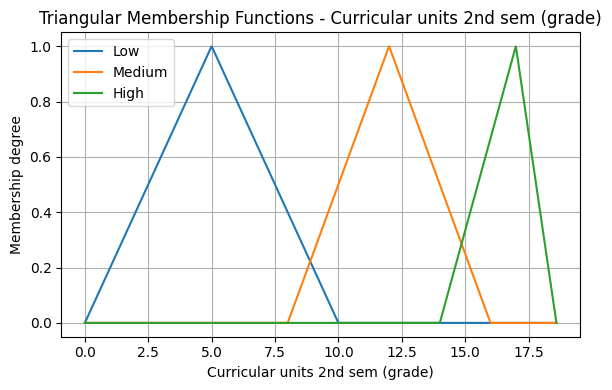

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# تابع عضویت مثلثی
def triangular_membership(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

# دیکشنری شامل ویژگی‌ها و بازه‌های مثلثی هر کدام
features_info = {
    "Application mode": [(1, 10, 20), (15, 25, 35), (30, 45, 57)],
    "Age at enrollment": [(17, 20, 23), (21, 26, 35), (30, 40, 70)],
    "Curricular units 1st sem (approved)": [(0, 2, 4), (3, 5, 7), (6, 10, 26)],
    "Curricular units 1st sem (grade)": [(0, 5, 10), (8, 12, 16), (14, 17, 18.9)],
    "Curricular units 2nd sem (approved)": [(0, 2, 4), (3, 5, 7), (6, 10, 20)],
    "Curricular units 2nd sem (grade)": [(0, 5, 10), (8, 12, 16), (14, 17, 18.6)],
}

# رسم نمودارها
for feature, (low, med, high) in features_info.items():
    x = np.linspace(low[0], high[2], 500)
    y_low = triangular_membership(x, *low)
    y_med = triangular_membership(x, *med)
    y_high = triangular_membership(x, *high)

    plt.figure(figsize=(6, 4))
    plt.plot(x, y_low, label='Low')
    plt.plot(x, y_med, label='Medium')
    plt.plot(x, y_high, label='High')
    plt.title(f"Triangular Membership Functions - {feature}")
    plt.xlabel(feature)
    plt.ylabel("Membership degree")
    plt.ylim(-0.05, 1.05)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [36]:
#Phase 3(اسکرچ بودن متود چک بشه)

In [37]:
from sklearn.model_selection import train_test_split

y = df["Target"]


df_fuzzy_train, df_fuzzy_test, y_train, y_test = train_test_split(
    df_fuzzy, y, test_size=0.2, stratify=y, random_state=42
)


In [38]:
from collections import defaultdict
import pandas as pd
import numpy as np

# ترکیب df_fuzzy و y_train در یک دیتافریم
df_rules = df_fuzzy_train.copy()
df_rules['Target'] = y_train.values

rules = []

# تبدیل هر سطر به یک قانون فازی
for idx, row in df_rules.iterrows():
    antecedent = []
    mu_list = []

    for col in df_fuzzy.columns:
        val = row[col]
        if val > 0:
            antecedent.append(col)
            mu_list.append(val)

    # درجه عضویت کل برای این مقدمه
    mu = np.min(mu_list)  # Minimum t-norm
    consequent = row['Target']

    rules.append((tuple(sorted(antecedent)), consequent, mu))

# ذخیره بهترین قانون برای هر مقدمه
best_rules = {}

for antecedent, consequent, weight in rules:
    key = (antecedent, consequent)
    if key not in best_rules or best_rules[key] < weight:
        best_rules[key] = weight

# حالا انتخاب بهترین قانون برای هر مقدمه یکتا
final_rules = {}

for (antecedent, consequent), weight in best_rules.items():
    if antecedent not in final_rules or final_rules[antecedent][1] < weight:
        final_rules[antecedent] = (consequent, weight)

# تبدیل به DataFrame نهایی
rules_df = pd.DataFrame([
    {'Antecedent': ' AND '.join(antecedent), 'Class': label, 'Weight': weight}
    for antecedent, (label, weight) in final_rules.items()
])

rules_df = rules_df.sort_values(by='Weight', ascending=False).reset_index(drop=True)


In [39]:
pd.set_option('display.max_colwidth', None)

print(rules_df[['Antecedent', 'Class', 'Weight']].head(30))

                                                                                                                                                                          Antecedent     Class    Weight
0                                                                                                           age_low AND debtor_no AND fees_paid AND gender_female AND no_scholarship   Dropout  1.000000
1                                                                                                             age_med AND debtor_no AND fees_paid AND gender_male AND no_scholarship   Dropout  1.000000
2                                                                                                          age_low AND debtor_yes AND fees_paid AND gender_female AND no_scholarship  Enrolled  1.000000
3                                                                                                                       debtor_no AND fees_paid AND gender_female AND no_scholarship  Enrolled  1.00

In [40]:
#Phase 4

In [41]:
!pip install deap


In [42]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# استفاده از مجموعه آموزشی فازی‌شده برای GA
X_train_ga = df_fuzzy_train
y_train_ga = y_train

# تقسیم مجموعه آموزشی GA به آموزش و اعتبارسنجی (validation)
from sklearn.model_selection import train_test_split
X_train_ga, X_val_ga, y_train_ga, y_val_ga = train_test_split(
    X_train_ga, y_train_ga, test_size=0.2, stratify=y_train_ga, random_state=42
)

rules_new_df = rules_df[:300]
# تعداد کل قوانین
num_rules = len(rules_new_df)

# تنظیمات برازندگی: Maximize
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# تابع تولید کروموزوم باینری
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_rules)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# تابع fitness
def evaluate(individual):
    selected_indices = [i for i, bit in enumerate(individual) if bit == 1]

    if len(selected_indices) == 0:
        return (0,)  # هیچ قانونی انتخاب نشده => برازندگی صفر

    # اعمال قوانین منتخب روی داده اعتبارسنجی
    predictions = []
    for i in range(len(X_val_ga)):
        row = X_val_ga.iloc[i]
        matched = False
        for idx in selected_indices:
            rule = rules_new_df.iloc[idx]
            antecedent = rule['Antecedent'].split(' AND ')
            match = all(row.get(feat.split('_')[0] + '_' + feat.split('_')[1]) == 1 for feat in antecedent if '_' in feat)
            if match:
                predictions.append(rule['Class'])
                matched = True
                break
        if not matched:
            predictions.append("Unknown")  # اگر هیچ قانونی منطبق نبود

    # فقط نمونه‌هایی را حساب می‌کنیم که طبقه‌بندی شده‌اند
    val_y_filtered = []
    preds_filtered = []
    for pred, true in zip(predictions, y_val_ga):
        if pred != "Unknown":
            val_y_filtered.append(true)
            preds_filtered.append(pred)

    if len(val_y_filtered) == 0:
        return (0,)  # هیچ نمونه‌ای طبقه‌بندی نشده

    acc = accuracy_score(val_y_filtered, preds_filtered)
    alpha = 1.0
    beta = 0.01
    fitness = alpha * acc - beta * (len(selected_indices) / num_rules)
    return (fitness,)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# اجرای الگوریتم ژنتیک
pop = toolbox.population(n=20)
NGEN = 10
for gen in range(NGEN):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))

# بهترین کروموزوم
best_ind = tools.selBest(pop, 1)[0]
selected_rules = rules_new_df[[bool(b) for b in best_ind]]

# نمایش
print("✅ تعداد قوانین انتخاب شده:", len(selected_rules))
print(selected_rules.head(10))


✅ تعداد قوانین انتخاب شده: 150
                                                                                                                                                                          Antecedent     Class    Weight
6                                                                                                        age_low AND debtor_yes AND fees_not_paid AND gender_male AND no_scholarship   Dropout  1.000000
11                                                                                    age_low AND appmode_high AND debtor_yes AND fees_not_paid AND gender_female AND no_scholarship   Dropout  0.933333
12                                                                                        age_med AND appmode_high AND debtor_yes AND fees_paid AND gender_female AND no_scholarship  Enrolled  0.933333
14       age_low AND appmode_high AND debtor_no AND fees_paid AND gender_female AND no_scholarship AND sem1_approved_med AND sem1_grade_med AND sem2_approved_med AND

In [43]:
selected_rules

,Antecedent,Class,Weight
6,age_low AND debtor_yes AND fees_not_paid AND gender_male AND no_scholarship,Dropout,1.000000
11,age_low AND appmode_high AND debtor_yes AND fees_not_paid AND gender_female AND no_scholarship,Dropout,0.933333
12,age_med AND appmode_high AND debtor_yes AND fees_paid AND gender_female AND no_scholarship,Enrolled,0.933333
14,age_low AND appmode_high AND debtor_no AND fees_paid AND gender_female AND no_scholarship AND sem1_approved_med AND sem1_grade_med AND sem2_approved_med AND sem2_grade_med,Graduate,0.928571
16,age_low AND debtor_no AND fees_paid AND gender_female AND has_scholarship AND sem1_approved_med AND sem1_grade_med AND sem2_approved_med AND sem2_grade_med,Graduate,0.906250
17,age_high AND debtor_no AND fees_paid AND gender_female AND no_scholarship AND sem1_approved_med AND sem1_grade_med AND sem2_approved_med AND sem2_grade_med,Enrolled,0.900000
18,age_med AND appmode_high AND debtor_yes AND fees_not_paid AND gender_female AND no_scholarship AND sem1_approved_med AND sem1_grade_med AND sem2_approved_med AND sem2_grade_med,Dropout,0.888889
19,age_low AND appmode_high AND debtor_no AND fees_paid AND gender_female AND no_scholarship AND sem1_approved_low AND sem1_grade_med AND sem2_approved_low AND sem2_grade_med,Dropout,0.875000
21,age_med AND appmode_high AND debtor_yes AND fees_not_paid AND gender_female AND no_scholarship,Enrolled,0.866667
22,age_med AND appmode_high AND debtor_no AND fees_not_paid AND gender_female AND no_scholarship,Dropout,0.866667


In [44]:
from collections import Counter

# مرحله استنتاج روی داده‌های تست
def fuzzy_inference(test_data, rules):
    predictions = []
    for i in range(len(test_data)):
        row = test_data.iloc[i]
        matched_classes = []

        for _, rule in rules.iterrows():
            antecedent = rule['Antecedent'].split(' AND ')
            match = all(row.get(feat, 0) == 1 for feat in antecedent if feat in row)
            if match:
                matched_classes.append(rule['Class'])

        # تجمیع: رأی‌گیری اکثریت
        if matched_classes:
            most_common = Counter(matched_classes).most_common(1)[0][0]
            predictions.append(most_common)
        else:
            predictions.append("Unknown")

    return predictions

# اجرای استنتاج روی df_fuzzy_test
final_preds = fuzzy_inference(df_fuzzy_test, selected_rules)

# فقط نمونه‌هایی را نگه می‌داریم که Unknown نیستند
filtered_preds = []
filtered_true = []
for pred, true in zip(final_preds, y_test):
    if pred != "Unknown":
        filtered_preds.append(pred)
        filtered_true.append(true)

# محاسبه دقت نهایی
if filtered_true:
    final_acc = accuracy_score(filtered_true, filtered_preds)
    print(f"🎯 دقت نهایی روی داده تست: {round(final_acc * 100, 2)}%")
    print(f"🔍 تعداد نمونه‌های طبقه‌بندی‌شده: {len(filtered_true)} از {len(y_test)}")
else:
    print("⚠️ هیچ نمونه‌ای در داده تست طبقه‌بندی نشد.")


🎯 دقت نهایی روی داده تست: 50.0%
🔍 تعداد نمونه‌های طبقه‌بندی‌شده: 12 از 885


📁 فایل fuzzy_test_predictions.xlsx با موفقیت ذخیره شد.


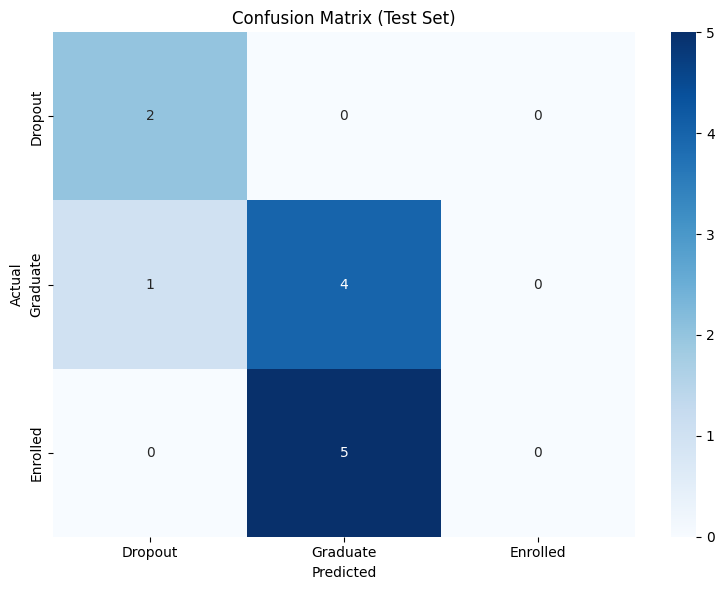

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ساخت DataFrame خروجی
results_df = pd.DataFrame({
    'True Label': filtered_true,
    'Predicted Label': filtered_preds
})

# ذخیره در فایل اکسل
results_df.to_excel("fuzzy_test_predictions.xlsx", index=False)
print("📁 فایل fuzzy_test_predictions.xlsx با موفقیت ذخیره شد.")

# رسم confusion matrix
cm = confusion_matrix(filtered_true, filtered_preds, labels=results_df['True Label'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=results_df['True Label'].unique(),
            yticklabels=results_df['True Label'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


📊 گزارش عملکرد مدل:
              precision    recall  f1-score   support

     Dropout       0.67      1.00      0.80         2
    Enrolled       0.00      0.00      0.00         5
    Graduate       0.44      0.80      0.57         5

    accuracy                           0.50        12
   macro avg       0.37      0.60      0.46        12
weighted avg       0.30      0.50      0.37        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31/4092719115.py:15: UserWarning: Glyph 128269 (\

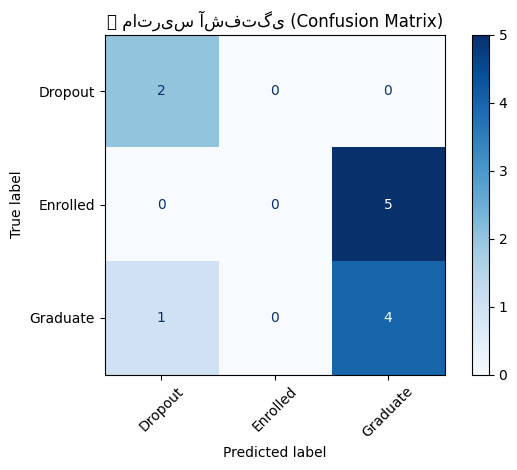

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# گزارش کامل شامل precision, recall, f1-score و accuracy
print("📊 گزارش عملکرد مدل:")
print(classification_report(filtered_true, filtered_preds))

# محاسبه ماتریس آشفتگی
cm = confusion_matrix(filtered_true, filtered_preds, labels=np.unique(y_test))

# نمایش ماتریس آشفتگی
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("🔍 ماتریس آشفتگی (Confusion Matrix)")
plt.tight_layout()
plt.show()
